# Signals and Systems
## Lab 2: Signal analysis with DFT
### Problem 15: "What's in a name?"

## Preparation

In [0]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio
!git clone --recursive https://github.com/Atellas23/sis_files
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import hamming, convolve
from scipy.io import wavfile
import pyaudio

In [0]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6*1.5
fig_size[1] = 4*1.5
plt.rcParams["figure.figsize"] = fig_size

## Voice recording
We recorded the sound with an auxiliar program and then saved it as a `.wav` file in a Github repository, so the results can be replicated anywhere. Now we load it, so we can use it for our analysis.

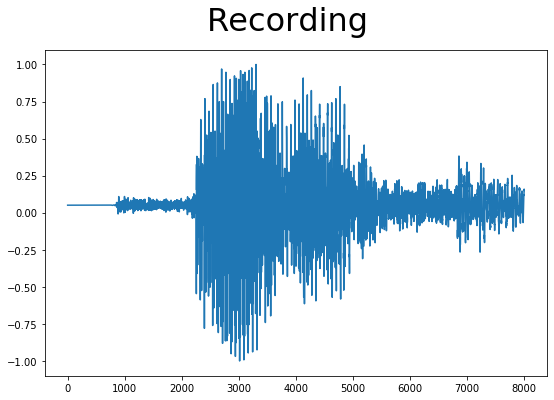

In [11]:
fsf, data = wavfile.read('/content/sis_files/lab2/aleix.wav')
data = data/2**15
fig = plt.figure(1)
plt.plot(data)
plt.suptitle("Recording", fontsize=32)
fig.show()

## Studying the voiced segment

First of all, we distinguish the voiced segment from the noise segment. Therefore, the following plot shows only the voiced segment. It says "Aleix".

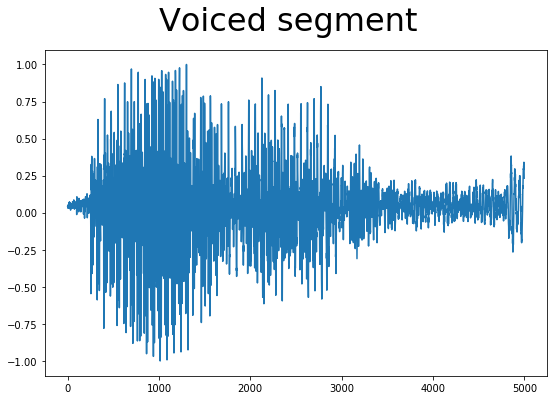

In [12]:
idx1 = 2000
idx2 = 7000
x = data[idx1:idx2] #Segment that contains the vowel.
fig = plt.figure(2)
plt.plot(x)
plt.suptitle("Voiced segment", fontsize=32)
fig.show()

Now, from this part of the recording we will take the first part, where we think the 'A' is. We also window the segment of the recording with a Hamming window.

In [0]:
i1 = 835
i2 = 1842
i3 = 1339
x2 = x[i1:i3]
wx2 = x2*hamming(i3-i1)

Here we can see both the windowing with a rectangular window and the windowing with the Hamming window:

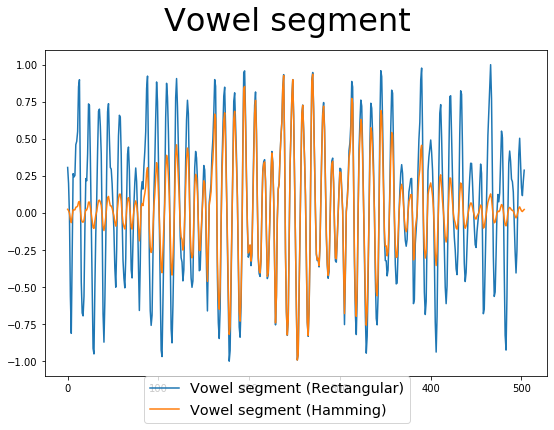

In [14]:
fig = plt.figure(3)
plt.plot(x2, label="Vowel segment (Rectangular)")
plt.plot(wx2, label="Vowel segment (Hamming)")
plt.suptitle("Vowel segment", fontsize=32)
legend = fig.legend(loc="lower center", fontsize="x-large")
fig.show()

Now, we compute the DFT of 504 samples of both the rectangular and the Hamming windowed signals.

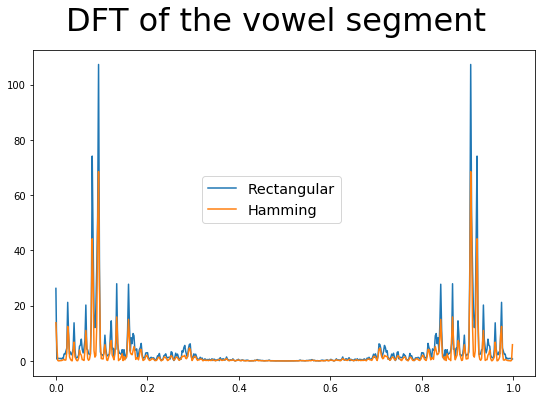

In [15]:
fig = plt.figure(5)
plt.plot(np.arange(504)/504, abs(fft(x2)), label = "Rectangular")
plt.plot(np.arange(504)/504, abs(fft(wx2)), label = "Hamming")
plt.suptitle("DFT of the vowel segment", fontsize=32)
legend = fig.legend(loc="center", fontsize="x-large")
fig.show()

From this graph, we can estimate the formant and fundamental frequencies:
- The fundamental frequency is calculated dividing the sampling frequency by the period of the signal. In our case, the period is $P=75$ and the sampling frequency is $f_s=8000$. Then,
$$
  f_f=\dfrac{f_s}{P}=\dfrac{8000}{75}\approx 107\text{ Hz}.
$$
So, the speaker is (unsurprisingly, as we already knew) more likely to be a man.
- The formant frequencies are the two most important peaks times the sampling frequency; the most important formant is clearly $f_1=f_s\cdot0.0932...\approx 745.6\text{ Hz}$, and the second formant is $f_2=f_s\cdot0.1587...\approx1269.6\text{ Hz}$. We can conclude that we have found an 'A'.

We can also study one period of the 'A' signal, where the formant peaks are more clearly distinguishable:

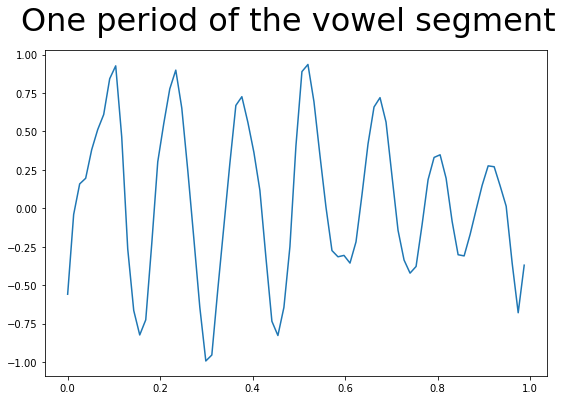

In [16]:
i4 = 230
i5 = 307
period = wx2[i4:i5]
fig = plt.figure(7)
plt.plot(np.arange(i5-i4)/(i5-i4), period, label = "One period")
plt.suptitle("One period of the vowel segment", fontsize=32)
fig.show()

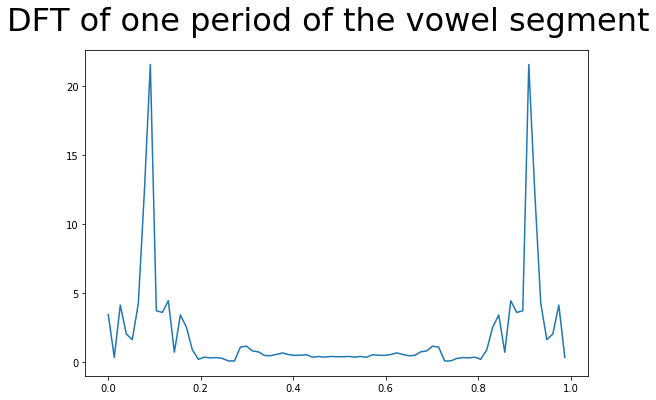

In [17]:
fig = plt.figure(8)
plt.plot(np.arange(i5-i4)/(i5-i4), abs(fft(period)), label = "DFT of one period")
plt.suptitle("DFT of one period of the vowel segment", fontsize=32)
fig.show()

Now, the formant frequencies can be more clearly calculated, as the two most prominent peaks are at $0.0879$ and at $0.1558$, so the formants are $f_1=8000\cdot0.0879\approx703.2$ and $f_2=8000\cdot0.1558\approx1246.4$.

- Aleix Torres Camps (aleix.torres.camps@est.fib.upc.edu)
- Àlex Batlle Casellas (alex.batlle@est.fib.upc.edu)